# Stock Market Prediction and Forecasting using Stack LSTM

### 1. We will collect the stock data -- AAPL 
### 2. Preprocess the data -- Train and Test
### 3. Create an stacked LSTM model
### 4. Predict the test data and plot the output
### 5. Predict the future 30 days and plot the output

## Data Collection

In [1]:
import pandas_datareader as pdr

In [7]:
!pip install pandas_datareader 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
key='9e76f338e618d7ad65d78e4f67e8a39d1deaa755'
df = pdr.get_data_tiingo('AAPL', api_key =key)

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-26 00:00:00+00:00,204.30,205.00,202.12,204.90,18649102,49.168310,49.336777,48.643656,49.312711,74596408,0.0,1.0
1,AAPL,2019-04-29 00:00:00+00:00,204.61,205.97,203.86,204.40,22204716,49.242917,49.570225,49.062417,49.192377,88818864,0.0,1.0
2,AAPL,2019-04-30 00:00:00+00:00,200.67,203.40,199.11,203.06,46534923,48.294688,48.951710,47.919248,48.869883,186139692,0.0,1.0
3,AAPL,2019-05-01 00:00:00+00:00,210.52,215.31,209.23,209.88,64827328,50.665260,51.818056,50.354800,50.511233,259309312,0.0,1.0
4,AAPL,2019-05-02 00:00:00+00:00,209.15,212.65,208.13,209.84,31996324,50.335546,51.177882,50.090066,50.501607,127985296,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2024-04-17 00:00:00+00:00,168.00,170.65,168.000,169.610,50901210,168.00,170.65,168.000,169.610,50901210,0.0,1.0
1253,AAPL,2024-04-18 00:00:00+00:00,167.04,168.64,166.550,168.030,43122903,167.04,168.64,166.550,168.030,43122903,0.0,1.0
1254,AAPL,2024-04-19 00:00:00+00:00,165.00,166.40,164.075,166.210,68149377,165.00,166.40,164.075,166.210,68149377,0.0,1.0
1255,AAPL,2024-04-22 00:00:00+00:00,165.84,167.26,164.770,165.515,48116443,165.84,167.26,164.770,165.515,48116443,0.0,1.0
1256,AAPL,2024-04-23 00:00:00+00:00,166.90,167.05,164.920,165.350,49537761,166.90,167.05,164.920,165.350,49537761,0.0,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
df1.shape

(1257,)

In [10]:
df1

0       204.30
1       204.61
2       200.67
3       210.52
4       209.15
         ...  
1252    168.00
1253    167.04
1254    165.00
1255    165.84
1256    166.90
Name: close, Length: 1257, dtype: float64

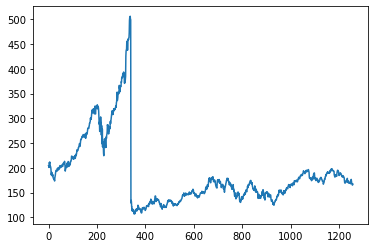

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

## LSTM are sensitive to the scale of the data, So we apply MinMax scaler

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
df1

0       204.30
1       204.61
2       200.67
3       210.52
4       209.15
         ...  
1252    168.00
1253    167.04
1254    165.00
1255    165.84
1256    166.90
Name: close, Length: 1257, dtype: float64

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.2441077 ],
       [0.24488416],
       [0.23501565],
       ...,
       [0.14567314],
       [0.14777708],
       [0.15043206]])

In [17]:
#Example
# 120,130,125,140,134,150 |||, 160,190,154
# cross validation
# random seed

#Timeseries data----> Train-- 120,130,125,140,134,150 
#Test-- 160,190,154

### Splitting dataset into train and test split

In [18]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size: len(df1), :1]

In [19]:
training_size, test_size

(817, 440)

In [20]:
len(train_data), len(test_data)

(817, 440)

In [21]:
train_data

array([[2.44107702e-01],
       [2.44884158e-01],
       [2.35015654e-01],
       [2.59686913e-01],
       [2.56255479e-01],
       [2.62767689e-01],
       [2.54577332e-01],
       [2.40500939e-01],
       [2.40601127e-01],
       [2.35140889e-01],
       [2.26274264e-01],
       [1.97570445e-01],
       [2.04934252e-01],
       [2.10594865e-01],
       [2.08490920e-01],
       [2.05785848e-01],
       [1.90983093e-01],
       [1.99774577e-01],
       [1.90206637e-01],
       [1.82391985e-01],
       [1.80663745e-01],
       [1.78810269e-01],
       [1.76681277e-01],
       [1.78985598e-01],
       [1.70895429e-01],
       [1.66462116e-01],
       [1.82341891e-01],
       [1.89605510e-01],
       [1.96318096e-01],
       [2.08666249e-01],
       [2.14752661e-01],
       [2.20338134e-01],
       [2.18785222e-01],
       [2.18685034e-01],
       [2.15153413e-01],
       [2.18033813e-01],
       [2.29455229e-01],
       [2.28002505e-01],
       [2.31984972e-01],
       [2.30281778e-01],


In [22]:
test_data

array([[0.11549155],
       [0.11211021],
       [0.12510958],
       [0.12651221],
       [0.13943644],
       [0.13693175],
       [0.1331747 ],
       [0.14850344],
       [0.14770194],
       [0.14654978],
       [0.14534753],
       [0.14547276],
       [0.15629305],
       [0.15441453],
       [0.16345648],
       [0.1661866 ],
       [0.16578585],
       [0.16959299],
       [0.16859111],
       [0.16200376],
       [0.15211021],
       [0.15125861],
       [0.15201002],
       [0.15827176],
       [0.14221666],
       [0.13660614],
       [0.13041954],
       [0.1261866 ],
       [0.12804008],
       [0.12265498],
       [0.11944897],
       [0.12303068],
       [0.11927364],
       [0.1265623 ],
       [0.14174076],
       [0.11772073],
       [0.12140263],
       [0.11403882],
       [0.10985598],
       [0.11932373],
       [0.1253851 ],
       [0.11742016],
       [0.11496556],
       [0.10917971],
       [0.11003131],
       [0.11251096],
       [0.10770194],
       [0.089

In [23]:
#-------DATA PREPROCESSING--------

#Train-- 120,130,125,140,134,150                 
# Timesteps =3
# Featuring based on timesteps converting to independent to dependent

#   x_train   y_train
# f1  f2  f3  o/p
#120  130  125  140
#130  125  140  134
#........


 
#Test-- 160,190,154,160,170

#y_train f1  f2   f3   o/p(y_test)
#       160  190  154   160
#       190  154  160   170

# after training LSTM model with this training datset will take test data predict it 
# and then try to compare with my y_test
# then will see how good accuracy is coming
#

## Convert an array of values into a dtaaset matrix

In [24]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

## Reshape into X = t, t+1, t+2, t+3 and Y = t+4

In [25]:
time_step = 100
X_train , y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [26]:
print(X_train)

[[0.2441077  0.24488416 0.23501565 ... 0.28030056 0.28318096 0.28518472]
 [0.24488416 0.23501565 0.25968691 ... 0.28318096 0.28518472 0.29036944]
 [0.23501565 0.25968691 0.25625548 ... 0.28518472 0.29036944 0.28583594]
 ...
 [0.13332498 0.14001252 0.14529743 ... 0.10427051 0.10852849 0.10076393]
 [0.14001252 0.14529743 0.1459737  ... 0.10852849 0.10076393 0.11060739]
 [0.14529743 0.1459737  0.14116468 ... 0.10076393 0.11060739 0.11571697]]


In [27]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [28]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

## Reshape input to be [samples, time steps, features ] which is required for LSTM

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Create the Stacked LSTM Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
!pip install typing-extensions>=4.3.0

In [32]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.1.0Note: you may need to restart the kernel to use updated packages.
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.fu

In [33]:
model = Sequential()

In [35]:
model.add(LSTM(50, return_sequences=True, input_shape=(100,1) ))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
X_train[:100]

array([[[0.2441077 ],
        [0.24488416],
        [0.23501565],
        ...,
        [0.28030056],
        [0.28318096],
        [0.28518472]],

       [[0.24488416],
        [0.23501565],
        [0.25968691],
        ...,
        [0.28318096],
        [0.28518472],
        [0.29036944]],

       [[0.23501565],
        [0.25968691],
        [0.25625548],
        ...,
        [0.28518472],
        [0.29036944],
        [0.28583594]],

       ...,

       [[0.28030056],
        [0.28318096],
        [0.28518472],
        ...,
        [0.50549781],
        [0.53102066],
        [0.53753287]],

       [[0.28318096],
        [0.28518472],
        [0.29036944],
        ...,
        [0.53102066],
        [0.53753287],
        [0.54695053]],

       [[0.28518472],
        [0.29036944],
        [0.28583594],
        ...,
        [0.53753287],
        [0.54695053],
        [0.53397621]]])

In [38]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 301ms/step - loss: 0.0486 - val_loss: 7.1925e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 0.0188 - val_loss: 0.0053
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.0137 - val_loss: 6.0612e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - loss: 0.0113 - val_loss: 3.0422e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - loss: 0.0084 - val_loss: 8.4880e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0074 - val_loss: 2.4745e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.0071 - val_loss: 5.3082e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.0077 - val_loss: 0.0027
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0072 - val_loss: 3.3054e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.0064 - val_loss: 2.0986e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.0057 - val_loss: 4.4035e-04
Epoc

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.16.1'

## Let's do the Prediction and check performance metrics

In [42]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


## Transformback to original form

In [43]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## calculate RMSE performance metrics

In [44]:
import math

In [45]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

216.36622631349513

## Test Data RMSE

In [47]:
math.sqrt(mean_squared_error(y_test, test_predict))

171.62708533391853

## Plotting
### Shift train predictions for plotting

In [48]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


### shift test predictions for plotting

In [49]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


### Plot baseline and predictions


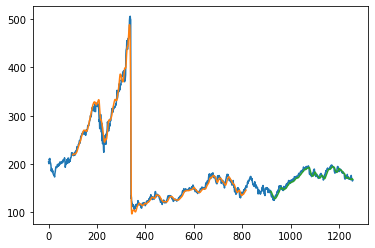

In [50]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data)

440

In [52]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0.1987476518472135,
 0.19724483406386972,
 0.19807138384470874,
 0.19233562930494674,
 0.18995616781465247,
 0.20485911083281144,
 0.21219787100814025,
 0.21803381340012518,
 0.2212648716343143,
 0.21956167814652466,
 0.2187351283656856,
 0.21435190983093294,
 0.2126236693800876,
 0.2033813400125234,
 0.1942642454602379,
 0.2004257983719474,
 0.19789605510331865,
 0.20247964934251717,
 0.20653725735754536,
 

In [62]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.21139637 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236
 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321
 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034
 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912
 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563
 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168
 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258
 0.19789606 0.20247965 0.20653726 0.20681277 0.20408265 0.20541014
 0.20115216 0.19586725 0.19363807 0.19291171 0.18902943 0.18715091
 0.18905448 0.1941891  0.18955542 0.18614903 0.18983093 0.18680025
 0.1851221  0.18239198 0.17097057 0.15849718 0.15599249 0.15569192
 0.16002505 0.16508453 0.16628679 0.16102693 0.16571071 0.16475892
 0.16751409 0.17342517 0.17991234 0.16162805 0.16390733 0.16032561
 0.15747026 0.16648716 0.16190357 0.15827176 0.15529117 0.15731997
 0.15524108 0.15714465 0.15431434 0.15737007 0.1526

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
import matplotlib.pyplot as plt
len(df1)
 

1257

ValueError: x and y must have same first dimension, but have shapes (100,) and (99, 1)

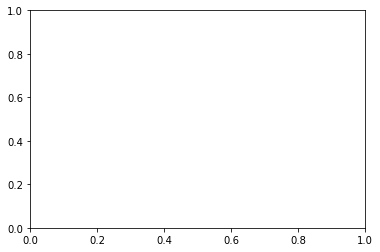

In [68]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


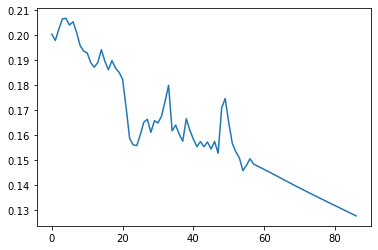

In [66]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


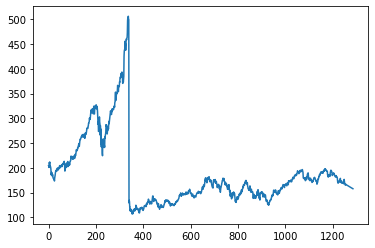

In [67]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)